# start2impact University | Progetto Advanced Analytics

Ti diamo il benvenuto nel notebook del progetto del Corso Advanced Analytics!

Prima di tutto bisogna importare una serie di librerie core, che saranno quelle principali per rispondere alle domande del progetto:

In [9]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

Per usare il tuo Google Drive con Colab, bisogna montarlo tramite il seguente comando. Dovrebbe chiederti l'accesso tramite il tuo account Google, concediglielo e seleziona tutte le spunte disponibili.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dopodiché puoi partire con l'importazione del dataset **supermarket sales**, il primo che ti servirà: dovresti averlo già uploadato nel tuo Drive, inserisci la location dove lo hai salvato andando a sostituire il placeholder *{PATH_AL_FILE_SUL_TUO_DRIVE}*, così da importarlo nell'ambiente di lavoro:

In [10]:
regression_raw_dataset = pd.read_csv('/content/drive/MyDrive/Start2Impact/supermarket_sales.csv', encoding='windows-1254')

# Esplorazione del dataset

**In questa breve sezione andrai a visualizzare il dataset in forma tabellare**, così da averne una rappresentazione più intuitiva e comprendere meglio con che tipologia di dato hai a che fare. Per semplicità si mostrano solo le prime 100 occorrenze.

In [11]:
regression_raw_dataset.head(100)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,594-34-4444,A,Yangon,Normal,Male,Electronic accessories,97.16,1,4.8580,102.0180,3/8/2019,20:38,Ewallet,97.16,4.761905,4.8580,7.2
96,766-85-7061,B,Mandalay,Normal,Male,Health and beauty,87.87,10,43.9350,922.6350,3/29/2019,10:25,Ewallet,878.70,4.761905,43.9350,5.1
97,871-39-9221,C,Naypyitaw,Normal,Female,Electronic accessories,12.45,6,3.7350,78.4350,2/9/2019,13:11,Cash,74.70,4.761905,3.7350,4.1
98,865-92-6136,A,Yangon,Normal,Male,Food and beverages,52.75,3,7.9125,166.1625,3/23/2019,10:16,Ewallet,158.25,4.761905,7.9125,9.3


Vai quindi a vedere più nel dettaglio quali sono i metadati principali delle colonne del dataset:

In [12]:
regression_raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Da questo puoi già vedere che non ci sono valori nulli, per cui non dovrai usare nessuna strategia per fillarli, altri valori invece sono categorici e quindi bisognerà usare una strategia per codificarli; insomma hai già un po' di informazioni di massima sul dato!
Alcune colonne risultano poco utili ai fini dell'analisi per la predizione e quindi vanno semplicemente eliminate, come per esempio l'ID della fattura, la data della vendita, l'orario e un altro paio:

In [13]:
regression_dataset = regression_raw_dataset.drop(columns=['Invoice ID', 'Tax 5%', 'Total', 'Date', 'Time', 'cogs', 'gross margin percentage'])

Puoi quindi vedere che alcune colonne sono state rimosse e adesso hai solo quelle che effettivamente sono utili ai fini dello sviluppo del modello:

In [14]:
regression_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Branch         1000 non-null   object 
 1   City           1000 non-null   object 
 2   Customer type  1000 non-null   object 
 3   Gender         1000 non-null   object 
 4   Product line   1000 non-null   object 
 5   Unit price     1000 non-null   float64
 6   Quantity       1000 non-null   int64  
 7   Payment        1000 non-null   object 
 8   gross income   1000 non-null   float64
 9   Rating         1000 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 78.3+ KB


# Media, mediana, moda e deviazione standard

Si parte con un esercizio molto semplice, in cui ti chiedo di **calcolare usando numpy la media, la mediana e la moda della colonna su cui andrai a fare predizioni (la label), ovvero Rating**. Ai fini del progetto la colonna Rating acquisisce un significato differente rispetto a quello originale del dataset: essa dà una valutazione alla transazione in base alla redditività della stessa e quindi ti dice quanto è stata proficua la stessa per la catena di supermercati.
Questo ti darà una prima idea di sintesi sui rating assegnati ai vari ordini:

In [15]:
# codice per calcolare la media, mediana e moda della label "Rating"

# Estraggo la colonna Rating
rating = regression_dataset['Rating'].values

media = np.mean(rating)
mediana = np.median(rating)
moda = regression_dataset['Rating'].mode()[0]


print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda}")

Media: 6.9727
Mediana: 7.0
Moda: 6.0


Come hai visto durante il Corso, la **deviazione** è una importantissima misura di "sparsità" dei dati, ed è una informazione che è molto utile da ottenere sulla label. Ti chiedo quindi di calcolarla, sempre usando Numpy:

In [16]:
# codice per calcolare la deviazione standard della label "Rating"

dev_std = np.std(rating)

print(f"Deviazione standard: {dev_std}")

Deviazione standard: 1.7177207893019169


# Come sono distribuiti i valori della label

A questo punto andiamo a vedere come sono graficamente distribuiti i dati:

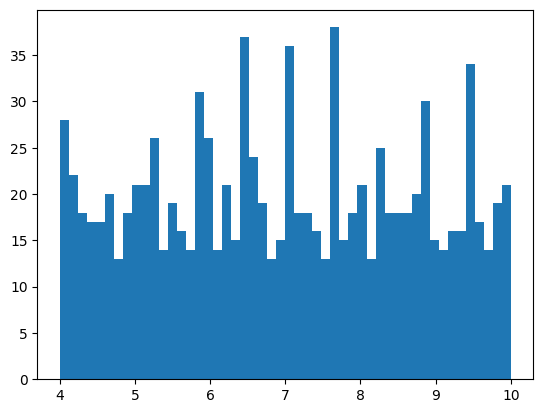

In [17]:
plt.hist(regression_dataset['Rating'], 50)
plt.show()

Come puoi vedere, la distribuzione dei rating è più o meno uniforme e non c'è skewness.

Il discorso è invece diverso per l'utile lordo:

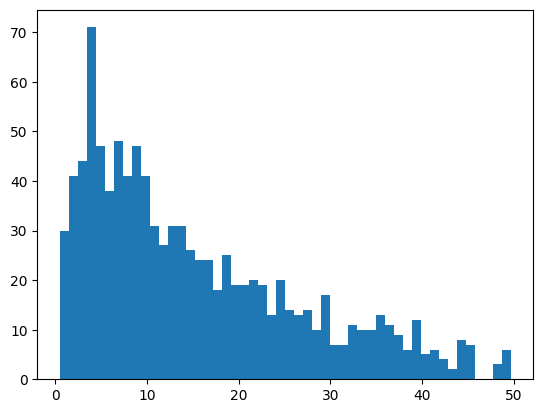

In [18]:
plt.hist(regression_dataset['gross income'], 50)
plt.show()

Come puoi vedere, qui la skewness c'è eccome e la maggioranza degli ordini sembra avere un income lordo basso.
Qual è, quindi, il valore di questa skewness esattamente? Tocca a te scoprirlo nella prossima cella!

Un piccolo consiglio: farlo con Numpy non è il modo più semplice!

In [19]:
# Codice per calcolare la skewness del gross income

skewness = regression_dataset['gross income'].skew()
print(f"Skewness di gross income: {skewness}")

Skewness di gross income: 0.8925698049581423


# Encoding delle variabili categoriche

Come avrai sicuramente notato, ci sono delle variabili (come "Branch", "City", "Customer type", "Gender", "Product line" e "Payment") che non sono numeriche e che quindi non possono essere direttamente masticate dagli algoritmi che andrai a utilizzare più tardi.
Ricordi le **tecniche per effettuarne l'enconding**? Questo è il momento di usarle per trasformarle in vettori!

In [20]:
# codice per effettuare l'enconding delle variabili categoriche

from sklearn.preprocessing import OneHotEncoder

# Prima raggruppo le colonne che devono essere trasformate in variabili numeriche
categorical_cols = ["Branch", "City", "Customer type", "Gender", "Product line", "Payment"]

# Poi inizializzo OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop='first') # per esempio se Branch_B e Branch_C sono entrambi = 0.0 allora = Branch_A

# Ci applico fit_transform
encoded_array = ohe.fit_transform(regression_dataset[categorical_cols])

# Ottengo i nomi delle colonne nuove
encoded_cols = ohe.get_feature_names_out(categorical_cols)

# Creo poi un nuovo DataFrame con i risultati
encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols)

# Resetto l'indice per unire senza errori
encoded_df.reset_index(drop=True, inplace=True)
regression_dataset.reset_index(drop=True, inplace=True)

# Infine unisco il dataset originale (senza le colonne categoriche) e quello codificato
final_dataset = pd.concat([regression_dataset.drop(columns=categorical_cols), encoded_df], axis=1)


final_dataset.head()


,Unit price,Quantity,gross income,Rating,Branch_B,Branch_C,City_Naypyitaw,City_Yangon,Customer type_Normal,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet
0,74.69,7,26.1415,9.1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,15.28,5,3.8200,9.6,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,46.33,7,16.2155,7.4,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,58.22,8,23.2880,8.4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,86.31,7,30.2085,5.3,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


# Feature Scaling

Nel dataset ci sono alcune feature che potrebbero essere standardizzate/normalizzate: quelle più evidenti sono sicuramente il prezzo del singolo oggetto, ovvero "Unit price", e "gross income" che come hai visto ha una grossa skewness. Questo dovrebbe migliorare la performance dei modelli che andrai a costruire a brevissimo, per cui ti chiedo di procedere in tal senso con la **standardizzazione**:

In [21]:
# codice per effettuare la standardizzazione della colonna "Unit price" e "gross income"
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(final_dataset[['Unit price', 'gross income']])

scaled_df = pd.DataFrame(scaled_features, columns=['Unit price', 'gross income'])

# Mantengo gli indici allineati
scaled_df.index = final_dataset.index

# Sostituisco le colonne originali
final_dataset[['Unit price', 'gross income']] = scaled_df

final_dataset.head()


,Unit price,Quantity,gross income,Rating,Branch_B,Branch_C,City_Naypyitaw,City_Yangon,Customer type_Normal,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet
0,0.718160,7,0.919607,9.1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-1.525303,5,-0.987730,9.6,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.352781,7,0.071446,7.4,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.096214,8,0.675780,8.4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.156959,7,1.267125,5.3,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


# Train e Test Split

Bene, è quindi giunta l'ora di affrontare l'ultima fase prima di allenare un modello di machine learning: l**o split fra training e test set**!
Per un primo approccio ti suggeriamo di usare una ratio 80:20 o 70:30, che il più delle volte funzionano bene.

Ti chiediamo di chiamare le feature di train, le feature di test, la label di train e le label di test rispettivamente con i nomi *X_train*, *X_test*, *y_train* e *y_test*:

In [22]:
from sklearn.model_selection import train_test_split

# codice per splittare il dataset in training set e test set

# Prima separo le feature dalla label
X = final_dataset.drop(columns=['Rating'])  # tutte le colonne tranne la label
y = final_dataset['Rating']                # la label da predire

# Poi decido di eseguire lo split 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (800, 16)
X_test: (200, 16)
y_train: (800,)
y_test: (200,)


# Linear Regression

Ora è giunto il momento di predire i **Rating** usando il modello più semplice che hai visto, ovvero la linear regression!
Ti chiediamo di chiamare il modello *regressor*.

Procedi pure nella cella che segue:

In [23]:
# training del modello con la linear regression

from sklearn.linear_model import LinearRegression

# Prima nizializzo il modello
regressor = LinearRegression()

# Poi alleno il modello sui dati di training
regressor.fit(X_train, y_train)


LinearRegression()

Adesso che il training è avvenuto è il momento di valutare come questo performa. Le metriche che prendiamo in considerazione, che sono le principali per la regressione lineare, sono **il mean squadred error e il mean absolute error**. Ti chiediamo di calcolarle (sempre usando sklearn), avendo cura di chiamarle rispettivamente *MSE* e *MAE*. Punta a renderle il più vicine allo zero possibile, perché il modello è più di qualità quanto più queste sono zero:

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Faccio le previsioni sul test set
y_pred = regressor.predict(X_test)

# Calcolo le metriche
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

print('MSE =', MSE, '\nMAE =', MAE, '\nR2 Score =', R2)

MSE = 3.110187291026073 
MAE = 1.5229214208487527 
R2 Score = -0.013816836503707242


# Polynomial Regression

Prova in questa sezione a lavorare in modo simile a quanto fatto per la linear regression, ma usando la polynomial regression, che è sicuramente più potente della prima.

Come prima, ti chiediamo di chiamare *regressor* il modello e *poly_regressor* l'oggetto relativo alle feature polinomiali:

In [38]:
# training del modello con la polynomial regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Prima creo le feature polinomiali fino al grado 2 (/3, /4)
poly_regressor = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_regressor.fit_transform(X_train)

# Poi: modello di regressione lineare applicato ai dati polinomiali
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

X_test_poly = poly_regressor.transform(X_test)
y_pred = regressor.predict(X_test_poly)



Come cambiano le performance? C'è effettivamente un miglioramento nell'MSE e nell'MAE?

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calcolo delle metriche
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

# Stampa dei risultati
print('MSE =', MSE, '\nMAE =', MAE, '\nR2 Score =', R2)

"""
Motivazioni per cui il modello peggiora all'aumentare del grado:

- Overfitting: il modello si adatta troppo ai dati di training.
  (Nel mio caso caso, il grado 2 ha le prestazioni migliori tra i modelli testati — grado 2, 3 e 4 — mentre il grado 4 mostra forte overfitting)
- Crescita esponenziale del numero di feature: ogni grado aggiuntivo aumenta drasticaemente le combinazioni tra variabili.
- Rumore nei dati: i modelli più complessi tendono a modellare anche la variabilità casuale.
- Limitatezza del dataset: pochi dati rendono difficile stimare correttamente tutti i parametri dei modelli più complessi.
- Instabilità del modello: le nuove feature polinomiali possono essere fortemente correlate tra loro, causando multicollinearità.
"""


MSE = 2447.4095011744685 
MAE = 32.91621802967724 
R2 Score = -796.7734862684885


"\nMotivazioni per cui il modello peggiora all'aumentare del grado:\n\n- Overfitting: il modello si adatta troppo ai dati di training.\n  (Nel mio caso caso, il grado 2 ha le prestazioni migliori tra i modelli testati — grado 2, 3 e 4 — mentre il grado 4 mostra forte overfitting)\n- Crescita esponenziale del numero di feature: ogni grado aggiuntivo aumenta drasticaemente le combinazioni tra variabili.\n- Rumore nei dati: i modelli più complessi tendono a modellare anche la variabilità casuale.\n- Limitatezza del dataset: pochi dati rendono difficile stimare correttamente tutti i parametri dei modelli più complessi.\n- Instabilità del modello: le nuove feature polinomiali possono essere fortemente correlate tra loro, causando multicollinearità.\n"

# Logistic Regression

In questa sezione si cambia dataset, in quanto cambia la natura del problema: si passa infatti a un problema di classificazione, in cui andrai a valutare la qualità di alcune mele destinate alla catena di supermercati per decidere quali sono le mele di qualità migliore.

La prima cosa è da fare è** importare il nuovo dataset**, ovvero apple_quality, che questa volta ti chiediamo di fare in autonomia, chiamando il dataset *classification_dataset*:

In [46]:
# codice per importare il dataset apple_quality

classification_dataset = pd.read_csv('/content/drive/MyDrive/Start2Impact/classification_dataset.csv', encoding='windows-1254')


Ti suggeriamo quindi  di printare le prime 50 righe...

In [ ]:
# codice per print delle prime 50 righe

classification_dataset.head(50)

... e dei metadati delle colonne:

In [48]:
# codice per visualizzare i principali metadata del dataset apple_quality

# Info generali: numero righe, colonne, tipi di dato, valori nulli
classification_dataset.info()

# Statistiche descrittive sulle colonne numeriche
classification_dataset.describe()

# Tengo solo le righe dove Acidity è convertibile in float
classification_dataset = classification_dataset[
    pd.to_numeric(classification_dataset['Acidity'], errors='coerce').notna()
]

# converto la colonna
classification_dataset['Acidity'] = classification_dataset['Acidity'].astype(float)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


/tmp/ipython-input-48-2375463931.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classification_dataset['Acidity'] = classification_dataset['Acidity'].astype(float)


Come puoi vedere, il dataset è già pulito e quasi tutte le colonne sono numeriche. L'unica a non esserlo è proprio la label, che va encodata:

In [50]:
from sklearn.preprocessing import OneHotEncoder

# Verifico che la colonna 'Quality' esista davvero
if 'Quality' in classification_dataset.columns:
    encoder = OneHotEncoder(drop=None, sparse_output=False)
    encoded_quality = encoder.fit_transform(classification_dataset[['Quality']])
    encoded_quality_df = pd.DataFrame(encoded_quality, columns=encoder.get_feature_names_out(['Quality']))

    # Unisco al dataset originale
    classification_dataset = classification_dataset.drop(columns=['Quality'])
    classification_dataset = pd.concat([classification_dataset, encoded_quality_df], axis=1)

classification_dataset.head()


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality_bad,Quality_good
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,0.0,1.0
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,0.0,1.0
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,1.0,0.0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,0.0,1.0
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,0.0,1.0


Bisogna poi ri-effettuare la divisione fra porzione di addestramento e porzione di test, usando la nomenclatura vista in precedenza:

In [51]:
# codice per splittare in train/test il dataset apple_quality
from sklearn.model_selection import train_test_split

X = classification_dataset.drop(columns=['Quality_good', 'Quality_bad', 'A_id'])
y = classification_dataset['Quality_good']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (3200, 7)
X_test: (800, 7)
y_train: (3200,)
y_test: (800,)


Puoi finalmente usare la logistic regression per allenare il modello vero e proprio, che ti chiedo di chiamare *logistic_regressor*:

In [ ]:
# codice per trainare il modello usando la logistic regression
from sklearn.linear_model import LogisticRegression

# Prima: istanzio il mio modello (il secondo LogisticRegression sovrascrive il primo)
# Istanzio una sola volta e uso questo per il prossimo step di scaling
logistic_regressor = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# Poi: alleno il modello
logistic_regressor.fit(X_train, y_train)

print("Modello di Logistic Regression addestrato con impostazioni iniziali.")

LogisticRegression(class_weight='balanced', max_iter=1000)

Una metrica che ti permette subito di valutare la bontà del modello, come saprai, è l'***F1 score***, che dovrebbe essere idealmente superiore a 0.80. Cerca anche di massimizzare la media della precision e del recall, che idealmente dovrebbero anch'essi essere superiori a 0.80:

In [57]:
#In questa cella faccio Scaling, ottimizzazione degli iperparametri e ricerca del miglior treshold.

import numpy as np
from sklearn.metrics import classification_report, f1_score, precision_recall_curve, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Faccio lo scaling dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ora: faccio l'ottimizzazione Iperparametri con GridSearchCV
print("Inizio ricerca dei migliori iperparametri con GridSearchCV...")

# Definisco lo scorer per l'F1-score
f1_scorer = make_scorer(f1_score)

# Definisco la griglia di iperparametri da testare
param_grid = {
    'penalty': ['l1', 'l2'],  # Provo: L1 e L2
    'C': [0.001, 0.01, 0.1, 1, 10, 100], # Vari valori per C (inverso della forza di regolarizzazione)
    'solver': ['liblinear', 'saga'], # Solutori che supportano sia L1 che L2
    'class_weight': ['balanced', None] # Mantengo 'balanced' o lo tolgop er provare senza
}

# Inizializzo il modello di regressione logistica per GridSearchCV
logistic_regressor_grid = LogisticRegression(max_iter=2000, random_state=42) # Aumento max_iter per robustezza

# Inizializzo GridSearchCV
grid_search = GridSearchCV(
    estimator=logistic_regressor_grid,
    param_grid=param_grid,
    scoring=f1_scorer, # F1-score usato come metrica di ottimizzazione
    cv=5, # Cross-validation a 5 fold
    verbose=1, # Per visualizzare il progresso
    n_jobs=-1 # Tutti i core del processore usati
)

# Eseguo la ricerca sulla griglia
grid_search.fit(X_train_scaled, y_train)

# Stampo i migliori iperparametri e il punteggio
print("\n--- Migliori Iperparametri Trovati ---")
print(f"Migliori parametri: {grid_search.best_params_}")
print(f"Miglior F1-score con cross-validation: {grid_search.best_score_:.4f}")

# Ottengo il miglior modello dalla ricerca
best_logistic_model = grid_search.best_estimator_

# Ora: faccio una ricerca del Miglior Threshold per il Modello Ottimizzato
print("\nInizio ricerca del miglior threshold per il modello ottimizzato...")

# Ottengo le probabilità per la classe positiva (y=1) dal miglior modello
y_prob = best_logistic_model.predict_proba(X_test_scaled)[:, 1]

# Calcolo precisione, recall e soglie per varie probabilità
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)

# Trovo il threshold che massimizza l'F1-score
# Aggiungo un piccolo valore per evitare divisioni per zero se precisione o recall sono 0
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]
best_f1_score_at_threshold = f1_scores[best_threshold_index]

print(f"Miglior soglia (threshold) per l'F1-score sul test set: {best_threshold:.4f}")
print(f"F1-score massimo sul test set con questa soglia: {best_f1_score_at_threshold:.4f}")

# Applico la migliore soglia per ottenere le predizioni finali
y_pred_final = (y_prob >= best_threshold).astype(int)

# Faccio la valutazione finale del modello ottimizzato con la migliore soglia
print("\n--- Report di Classificazione Finale (Modello Ottimizzato + Migliore Soglia) ---")
print(classification_report(y_test, y_pred_final))

Inizio ricerca dei migliori iperparametri con GridSearchCV...
Fitting 5 folds for each of 48 candidates, totalling 240 fits

--- Migliori Iperparametri Trovati ---
Migliori parametri: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Miglior F1-score con cross-validation: 0.7514

Inizio ricerca del miglior threshold per il modello ottimizzato...
Miglior soglia (threshold) per l'F1-score sul test set: 0.3855
F1-score massimo sul test set con questa soglia: 0.7772

--- Report di Classificazione Finale (Modello Ottimizzato + Migliore Soglia) ---
              precision    recall  f1-score   support

         0.0       0.83      0.63      0.72       401
         1.0       0.70      0.87      0.78       399

    accuracy                           0.75       800
   macro avg       0.77      0.75      0.75       800
weighted avg       0.77      0.75      0.75       800



Ora è intessante andare a "disegnare" la **confusion matrix**, che ti mostra quali sono le categorie su cui il modello che hai costruito è "bravo" e su quali no, così da eventualmente avere delle informazioni in più per migliorarlo. Prova a farlo in autonomia usando scikit-learn:

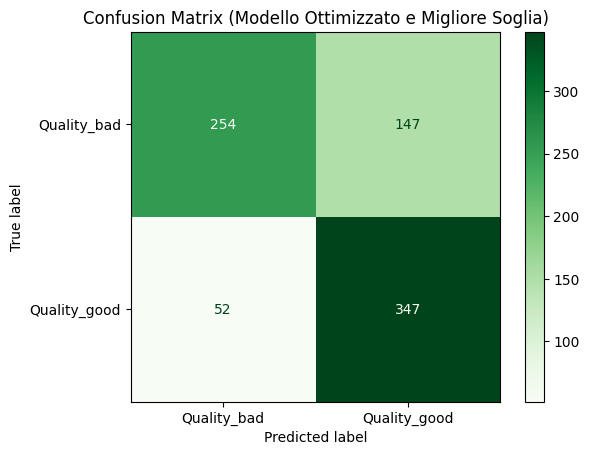

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt # Importa per mostrare il plot

# Utilizziamo le predizioni finali ottenute dalla cella precedente
# y_pred_final è già stato calcolato con il modello ottimizzato e la migliore soglia
cm = confusion_matrix(y_test, y_pred_final)

# Visualizzazione della matrice
# Per ConfusionMatrixDisplay, i labels devono essere quelli reali o mappati
# In questo caso, 0 per 'bad' e 1 per 'good'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Quality_bad', 'Quality_good'])
disp.plot(cmap='Greens')
plt.title("Confusion Matrix (Modello Ottimizzato e Migliore Soglia)")
plt.show() # Mostra il plot

# Decision Tree

**Puoi provare a usare un decision tree per capire se può migliorare le prestazioni del modello basato su logistic regression.** Generalmente, come visto durante la parte teorica del Corso, i decision tree sono più potenti, ma scoprilo costruendone uno!

Il procedimento non è dissimile da quelli usati in precedenza, quindi procedi pure al training:

In [60]:
# training del modello con un decision tree

# Definisci lo scorer per l'F1-score (come per la Logistic Regression)
f1_scorer = make_scorer(f1_score)

# Definisci la griglia di iperparametri da testare
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, 15, 20, None],
    'criterion': ['gini', 'entropy'],        # Prova entrambi i criteri di split
    'min_samples_leaf': [1, 5, 10],          # Aggiungo un parametro per controllare l'overfitting
    'min_samples_split': [2, 5, 10]          # Aggiungo un parametro per controllare l'overfitting
}

# Prima: istanzio il modello Decision Tree per GridSearchCV
decision_tree_grid = DecisionTreeClassifier(random_state=42)

# Inizializzo GridSearchCV
print("Inizio ricerca dei migliori iperparametri per Decision Tree con GridSearchCV...")
grid_search_dt = GridSearchCV(
    estimator=decision_tree_grid,
    param_grid=param_grid_dt,
    scoring=f1_scorer, # l'F1-score usato come metrica di ottimizzazione
    cv=5, # Cross-validation a 5 fold
    verbose=1, # Per visualizzare il progresso
    n_jobs=-1 # Uso tutti i core del processore
)

# Poi: alleno il modello
grid_search_dt.fit(X_train, y_train)

# Stampo i migliori iperparametri e il punteggio
print("\n--- Migliori Iperparametri Trovati per Decision Tree ---")
print(f"Migliori parametri: {grid_search_dt.best_params_}")
print(f"Miglior F1-score con cross-validation: {grid_search_dt.best_score_:.4f}")

# Ottiengo il miglior modello dalla ricerca
best_decision_tree = grid_search_dt.best_estimator_

# Poi: faccio predizioni sul test set con il miglior modello
y_pred_tree = best_decision_tree.predict(X_test)

# Infine: valuto le performance del miglior modello
print("\n--- Report di Classificazione Finale (Decision Tree Ottimizzato) ---")
print(classification_report(y_test, y_pred_tree))

Inizio ricerca dei migliori iperparametri per Decision Tree con GridSearchCV...
Fitting 5 folds for each of 126 candidates, totalling 630 fits

--- Migliori Iperparametri Trovati per Decision Tree ---
Migliori parametri: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Miglior F1-score con cross-validation: 0.8031

--- Report di Classificazione Finale (Decision Tree Ottimizzato) ---
              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81       401
         1.0       0.81      0.81      0.81       399

    accuracy                           0.81       800
   macro avg       0.81      0.81      0.81       800
weighted avg       0.81      0.81      0.81       800



E poi alla costruzione della confusion matrix:

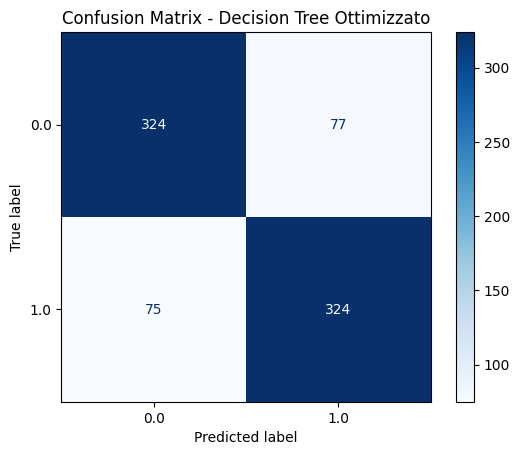

In [61]:
# confusion matrix del decision tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt # Importa per mostrare il plot

# Uso le predizioni del modello ottimizzato precedentemente
cm = confusion_matrix(y_test, y_pred_tree)

# Visualizzo la matrice
# decision_tree.classes_ verrà da best_decision_tree.classes_ che è il modello ottimizzato
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_decision_tree.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Decision Tree Ottimizzato")
plt.show()

Quanti sono gli errori? Di più o di meno di quelli commessi dal modello con la logistic regression?

Quali sono le feature che sono state più importanti per il decision tree che hai costruito? Scoprilo con la feature importance, che ti invitiamo a calcolare e poi a printare nella cella che segue:

       Feature  Importance
5     Ripeness    0.203931
0         Size    0.178952
2    Sweetness    0.157281
6      Acidity    0.134534
4    Juiciness    0.130092
3  Crunchiness    0.100041
1       Weight    0.095169


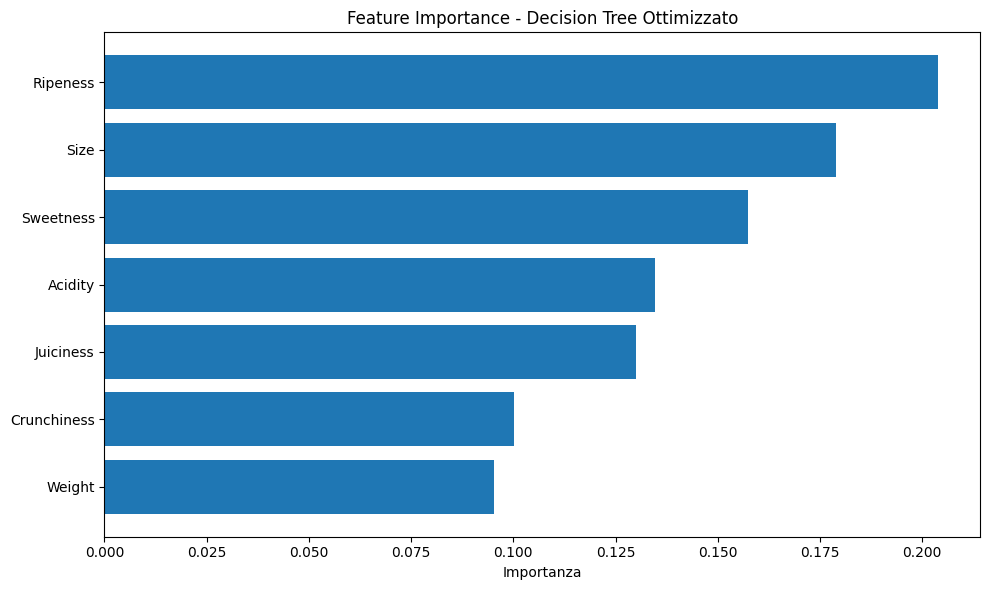

In [62]:
# codice per la feature importance
import matplotlib.pyplot as plt
import pandas as pd # Assicurati che pandas sia importato

# Prima: ottengo i nomi delle colonne
feature_names = X_train.columns

# Poi: ottengo l'importanza delle feature dal miglior modello
importances = best_decision_tree.feature_importances_

# Poi: creo un DataFrame ordinato per visualizzazione
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Poi: stampo la tabella
print(feature_importance_df)

# Infine: faccio il grafico a barre
plt.figure(figsize=(10, 6)) # Aumento leggermente la dimensione del grafico
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importanza')
plt.title('Feature Importance - Decision Tree Ottimizzato')
plt.gca().invert_yaxis() # Mantiene la feature più importante in alto
plt.tight_layout() # Regolo i margini per evitare che le etichette vengano tagliate
plt.show()

Ciò che ho fatto nella sezione del Decision Tree è stato:


*   Ottimizzare gli iperparametri con GridSearchCV (trovata la migliore combinazoine di iperparametri specifici per gli alberi decisionali). E quindi: max_depth (splorazione di diverse profondità massime per prevenire overfitting e underfitting), criterion e min_samples/min_samples_split (per controllare ulteriormente la granularità della crescita dell'albero + migliorare la generalizzabilità)
*   Valutare le performance ottimizzate (classification_report)
*   Analisi della feature importance






# K-Means Clustering

Eccoci al K-Means Clustering, il più utilizzato algoritimo tra quelli non supervisionati.

Per prima cosa bisogna eliminare la label perché, come sai, il K-Means Clustering è un algoritmo non supervisionato e non deve quindi averla:

In [ ]:
clustering_dataset = classification_dataset.drop(columns=['Quality_bad', "Quality_good"])

Prova a trainare il modello usando l'algoritmo in oggetto, il procedimento è sempre simile a quanto visto in precedenza. Prova a settare dapprima il numero dei cluster a due (in quanto sappiamo che il dataset contiene mele buone o non buone):

In [66]:
# codice per trainare il modello con K-Means Clustering

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Seleziono solo le colonne numeriche rilevanti per il clustering
colonne_clustering = clustering_dataset.drop(columns=['A_id', 'Cluster'], errors='ignore').columns

# Standardizzo solo quelle colonne
scaler = StandardScaler()
X_scaled = scaler.fit_transform(clustering_dataset[colonne_clustering])

# Fit del modello
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)


# Etichette assegnate ai cluster
cluster_labels = kmeans.labels_

clustering_dataset['Cluster'] = cluster_labels

clustering_dataset.tail()


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Cluster
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,0
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,1
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,2
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,2
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796,1


Effettua quindi una predizione e vedi a che qualità corrisponde la mela che hai dato in input al modello:

In [ ]:
# codice per effettuare la predizione su una mela dalle carattetistiche a piacere
# Prima: prendo solo le colonne effettivamente usate per il clustering
colonne_usate = clustering_dataset.drop(columns=['A_id', 'Cluster'], errors='ignore').columns

# Poi: creo la nuova mela rispettando l’ordine delle colonne
nuova_mela_df = pd.DataFrame([{
    'Size': 0.5,
    'Weight': -1.2,
    'Sweetness': 3.0,
    'Crunchiness': 1.1,
    'Juiciness': 2.5,
    'Ripeness': 0.8,
    'Acidity': 0.0
}])[colonne_usate]

# poi: standardizzo
nuova_mela_scaled = scaler.transform(nuova_mela_df)

cluster_predetto = kmeans.predict(nuova_mela_scaled)
print(f"La mela è stata assegnata al cluster: {cluster_predetto[0]}")


La mela è stata assegnata al cluster: 2


A che cluster è stata assegnata la mela, è buona o cattiva?
Che succede se invece provi a settare il numero di cluster a tre? Testa questo scenario e rifai la predizione, magari potresti scoprire che in realtà ci sono anche delle mele di qualità intermedia!

# Time Series

L'ultimo tema del progetto è quello delle time series: se ci hai fatto caso, il dataset che hai utilizzato per la regressione è in realtà una time series a cui, per il problema di regressione stesso, è stata eliminata l'informazione sul tempo in quanto non utile in quello use case. Adesso è tempo di riprenderla!
In questo scenario vogliamo provare a **capire come i gross income evolvono nel tempo**, quindi prendi il dataset originale, ovvero *regression_raw_dataset* ed elimina tutte le colonne, tenendo solo "Date" e "gross income" e avendo cura di chiamare *timeseries_dataset* il nuovo dataset:

In [ ]:
# codice per costruire un nuovo dataset, partendo da regression_raw_dataset, con solo le colonne "Date" e "gross income"

# Costruisco il nuovo dataset per le time series
timeseries_dataset = regression_raw_dataset[['Date', 'gross income']].copy()

# Visualizzo le prime righe per controllo
timeseries_dataset.head()


,Date,gross income
0,1/5/2019,26.1415
1,3/8/2019,3.8200
2,3/3/2019,16.2155
3,1/27/2019,23.2880
4,2/8/2019,30.2085


Dai un rapido sguardo al nuovo dataset creato, per assicurarti che sia tutto ok:

In [ ]:
timeseries_dataset.head(100)

,Date,gross income
0,1/5/2019,26.1415
1,3/8/2019,3.8200
2,3/3/2019,16.2155
3,1/27/2019,23.2880
4,2/8/2019,30.2085
...,...,...
95,3/8/2019,4.8580
96,3/29/2019,43.9350
97,2/9/2019,3.7350
98,3/23/2019,7.9125


A questo punto prova a utilizzare la **linear regression** su questa serie temporale, nello stesso modo di quanto già fatto in precedenza:

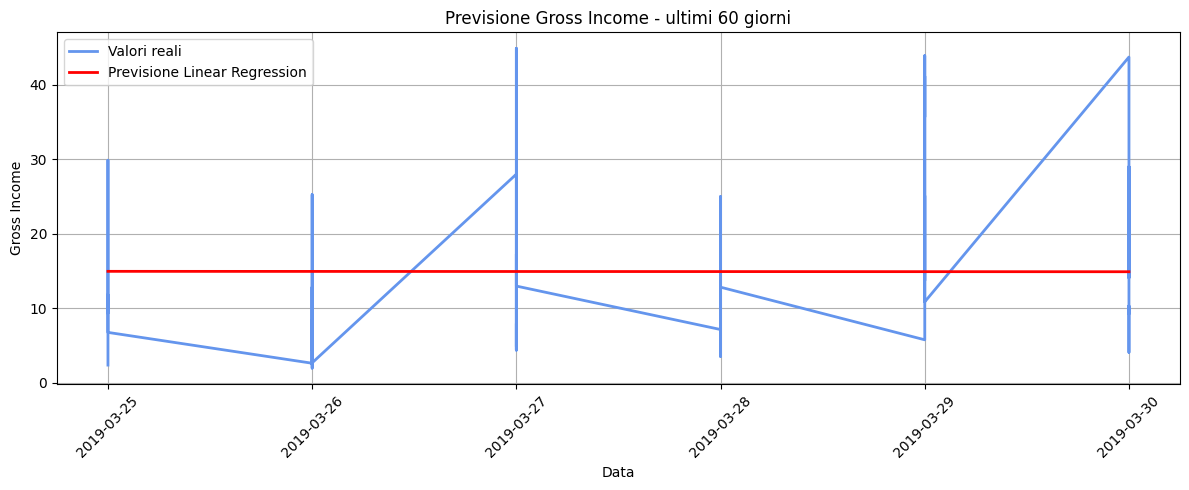

In [ ]:
# training della time series con la linear regression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prima: converto la colonna 'Date' in formato da stringa a datetime
timeseries_dataset['Date'] = pd.to_datetime(timeseries_dataset['Date'])

# Poi: ordino per data
timeseries_dataset = timeseries_dataset.sort_values('Date')

# Poi: creo la colonna numerica per regressione
timeseries_dataset['Date_ordinal'] = timeseries_dataset['Date'].map(pd.Timestamp.toordinal)

X = timeseries_dataset[['Date_ordinal']]
y = timeseries_dataset['gross income']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Ultimi 60 giorni (ordinati)
last_60 = timeseries_dataset.tail(60)
X_60 = last_60[['Date_ordinal']]
y_60 = last_60['gross income']
y_pred_60 = model.predict(X_60)


# Infine: plot
plt.figure(figsize=(12, 5))
plt.plot(last_60['Date'], y_60, label='Valori reali', color='cornflowerblue', linewidth=2)
plt.plot(last_60['Date'], y_pred_60, color='red', label='Previsione Linear Regression', linewidth=2)
plt.xlabel('Data')
plt.ylabel('Gross Income')
plt.title('Previsione Gross Income - ultimi 60 giorni')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

E vai a controllare le solite metriche, cioè MSE ed MAE:

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calcolo delle metriche
MSE = mean_squared_error(y, y_pred)
MAE = mean_absolute_error(y, y_pred)

print('MSE =', MSE, '\nMAE =', MAE)

MSE = 136.88768067988784 
MAE = 9.615855455467656


Ti renderai conto che probabilmente non sono così elevati come in precedenza, questo perché la regressione lineare sulle time series spesso fallisce e, come già visto nella teoria, c'è bisogno di altri modelli più perfomanti.

# Time Series con XGBoost (opzionale)

A proposito di modelli più performanti per le time series, ricordi XGBoost? Se ti va, puoi provare a impiegare quest'ultimo per costruire il modello. **Questa sezione è opzionale e non necessaria per superare il progetto.**

MSE: 158.79
MAE: 10.03


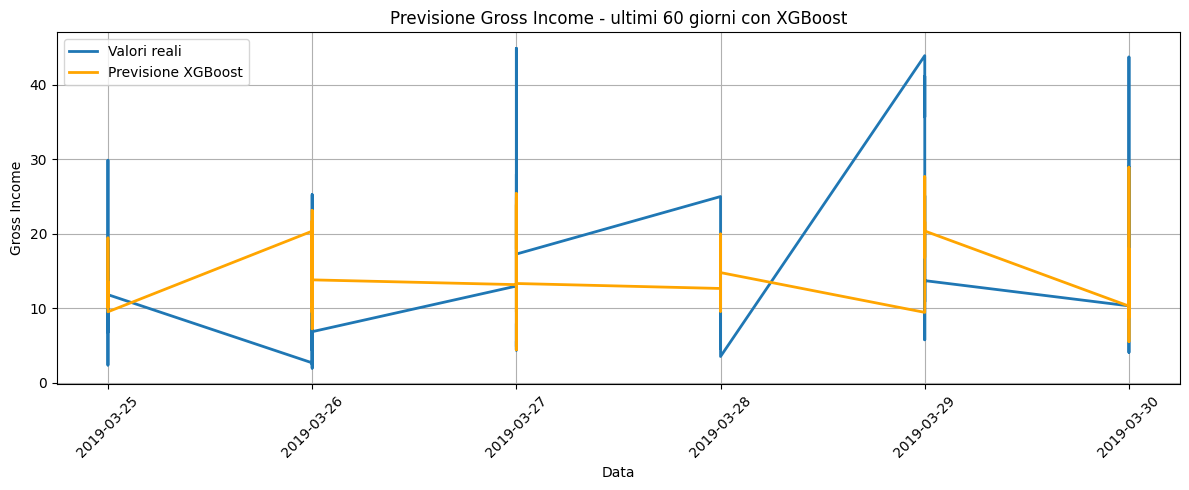

In [ ]:
# (BONUS) Training e valutazione delle performance della time series con XGBoost
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Prima: parto dal dataset con Date e gross income
df = timeseries_dataset.copy()
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Poi: creo delle lag features
for lag in range(1, 8):  # usa i 7 giorni precedenti
    df[f'lag_{lag}'] = df['gross income'].shift(lag)

# Poi: rimuovo i nan
df = df.dropna().reset_index(drop=True)

# Poi: separo tra feature e target
X = df[[f'lag_{i}' for i in range(1, 8)]]
y = df['gross income']
date = df['Date']

# Poi: suddivido training/test set
split_index = -60
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]
date_test = date[split_index:]

# Poi: addestro XGBoost
model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

df['rolling_mean_3'] = df['gross income'].rolling(window=3).mean().shift(1)
df['rolling_mean_7'] = df['gross income'].rolling(window=7).mean().shift(1)

# Poi: mi dedico alle previsioni
y_pred = model.predict(X_test)

# Poi: faccio valutazione delle performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")

# Infine: visualizzo
plt.figure(figsize=(12, 5))
plt.plot(date_test, y_test, label='Valori reali', linewidth=2)
plt.plot(date_test, y_pred, label='Previsione XGBoost', color='orange', linewidth=2)
plt.title('Previsione Gross Income - ultimi 60 giorni con XGBoost')
plt.xlabel('Data')
plt.ylabel('Gross Income')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
